**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica: OpenCV y Operaciones de punto
```

# <font color=#FF0000>OpenCV</color>

* Mas de 2500 algoritmos optimizados

* C/C++, Python, Java y MATLAB, soporta Windows, Linux, Android y Mac OS

* Cuda y OpenCL (Actualmente en desarrollo)

In [4]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Leer y mostrar una imagen con OpenCV**

Lectura -> cv2.imread(ruta de imagen, opc*)
 * Corregir colores usando indexación
 * Corregir colores cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 * opc -> cv2.IMREAD_GRAYSCALE

In [7]:
imgSRC = './lab_images/robotSofia.jpg'

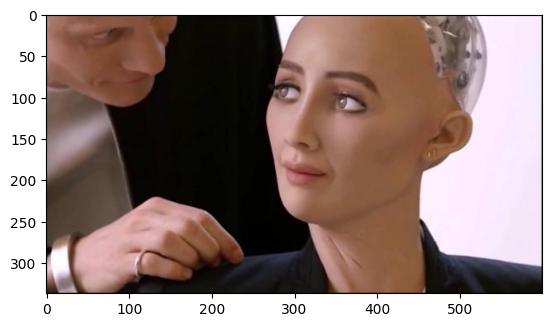

In [9]:
img = cv2.imread(imgSRC) #[..., ::-1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

P1. Que sucede si usamos matplotlib para mostrar una imágen leída con openCV?
- Se van a generar errores en los colores al mostrar la misma imagen pero con la biblioteca de Matplotlib ya que esta última espera que las imágenes esten en un formato GGB (Rojo, Verde, Azul), en cambio OpenCV interpreta las imágenes en un formato de BRG (Azul,Verde,Rojo), por lo cual, existe una variación en el orden del rojo y en azul, es por ello que al mostrar con Matplotlib, sin realizar un ajuste en el código, se mostrará una figura verdosa o azulado.

### **Consideraciones al mostrar imagenes con matplotlib**

*Imagen en escala de grises*

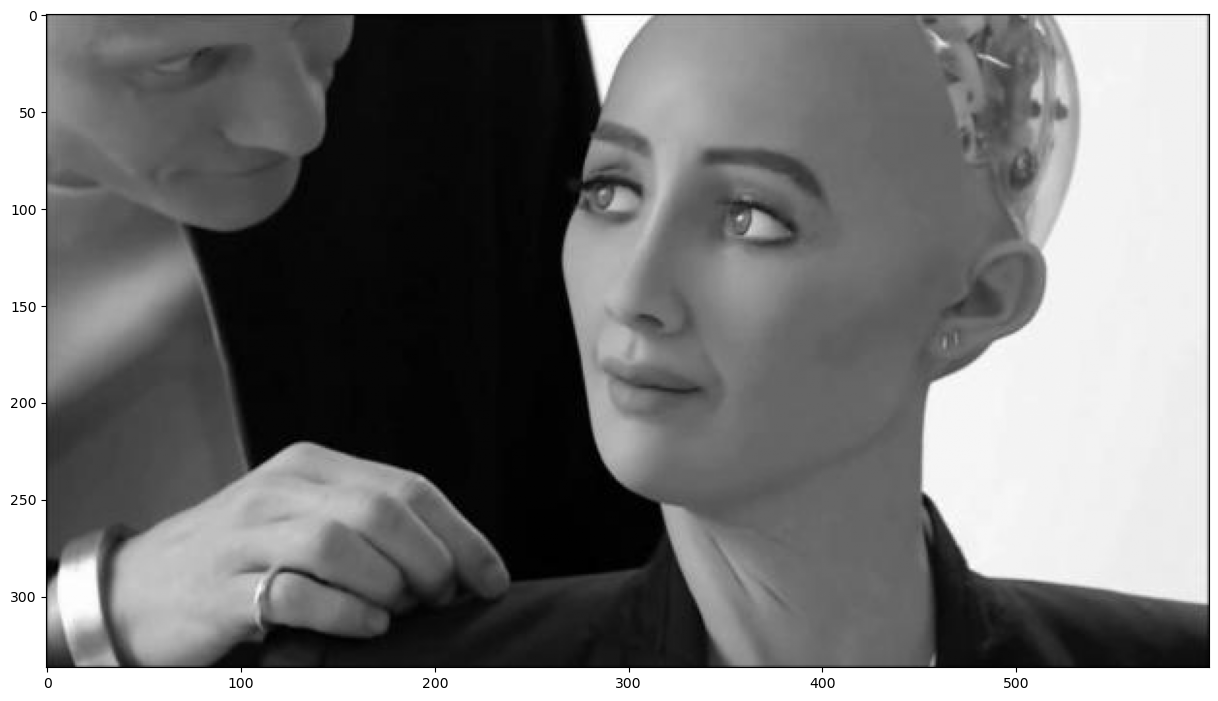

In [7]:
img = cv2.imread(imgSRC,0)
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

 * Se realiza un autoescalado 

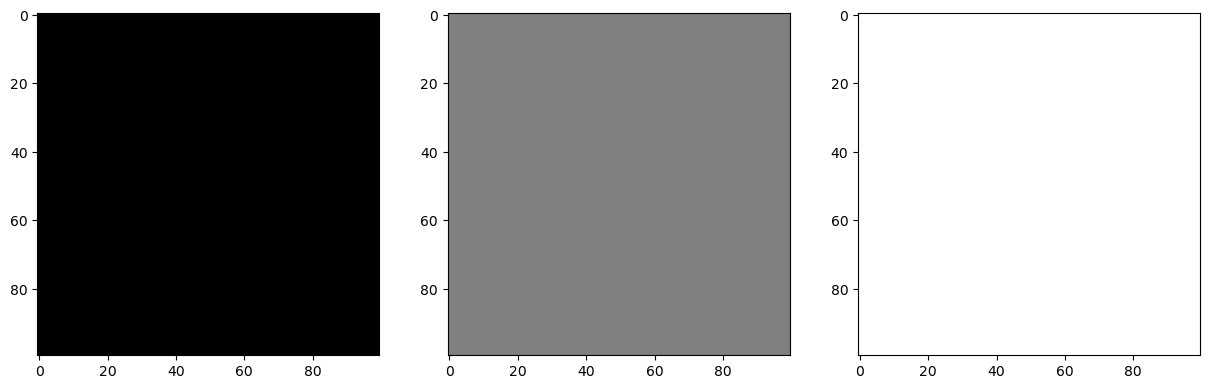

In [8]:
black = np.zeros([100, 100], dtype=np.uint8)
gray = np.ones([100, 100], dtype=np.uint8) * 128
white = np.ones([100, 100], dtype=np.uint8) * 255

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.imshow(black, cmap='gray', vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(133)
plt.imshow(white, cmap='gray', vmin=0, vmax=255)
plt.show()

P2. Explique la utilidad de vmin y vmax y cuando es importante tenerlo en cuenta:

La función de Vmin y Vmáx son utilizados como parámetros que establecen el rango de valores que se analizará en los colores de la imagen, lo cual estos parámetros son utilizados por la biblioteca de matplotlib, en el que Vmínimo solo se emplea los datos mínimos que se mapearan al color más bajo del colormap, en cambio cuando se usa Vmáximo es definir el límite máximo de valor de los datos que se mapearán al color más alto del colormap (mapa de color), entonces los valores que no están en ese rango se mostran como color mínimo para menor al Vmin y color máximo mayores al Vmáx.

Por lo tanto, se utilizan estos parámetros para:

-	La visualización de imágenes en escala de grises o de colores únicos, entonces Matplolib genera un ajuste para los valores mínimos y máximos de la imagen.
-	Permite la comparación de imágenes con un mismo rango de colores, para poder visualizar detalladamente la intensidad de color como un mismo valor de datos.
-	Permite la optimización de los valores importantes a analizar porque en un conjunto de datos que presenta las imágenes, suelen tener datos muy elevados que no contribuyen a la información que se requiere utilizar, por lo cual es que con Vmax y Vmin se logra acortar los datos y así se pueda utilizar toda la escala para mejorar el contraste.


### **Escalando los colores y dibujando dentro de una imagen**


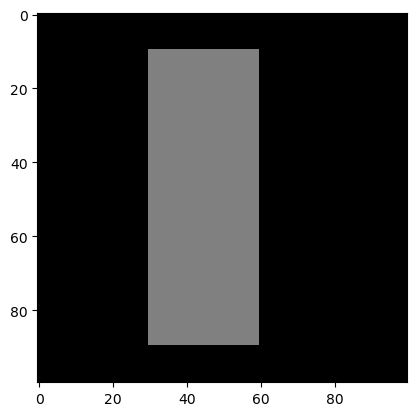

In [9]:
black = np.zeros([100, 100], dtype=np.uint8)
black[10:90, 30:60] = 128

black = black/255

plt.imshow(black, cmap='gray', vmin=0, vmax=1)
plt.show()

P3. Que tipo de dato es la imagen despues de dividir entre 255? 
- Al utilizar black de tipo unit8(un enetero sin digno de 8 bits), lo cual su rango está entre 0 a 255, es asi que al dividir entre 255, se genera datos de tipo float64(números reales en doble precisión), ya que la división produce 0.0 y 1.0, lo que se concluye que no pueden ser números enteros, por lo tanto son de tipo float64.

In [10]:
type(black)
# numpy.ndarray
black.dtype
# dtype('float64')

dtype('float64')

P4. Explique como funcionan los ejes en las imágenes mostradas en python.

- La figura al estar analizada en 2D,se toma como origen al (0,0), el que se encuentra arriba y a la izquierda, pero esto se debe a que en las máquinas se analiza las imágenes digitales en el eje Y desde arriba hacia abajo porque se almacena línea por línea desde arriba, es por ello que en la imagen se puede ver esta convección donde el eje X crece de izquierda a derecha, pero el eje Y lo hace de arriba hacia abajo por la convección digital,considerando que la librerií de matplotlib muestra la fila 0 en la parte superior.

### **Creando formas dentro de una imagen con numpy y OpenCV**
 * cv2.rectangle(img, pt1, pt2, (color RGB), thickness= )
 * cv2.line(img, pt1, pt2, (color RGB),thickness= )

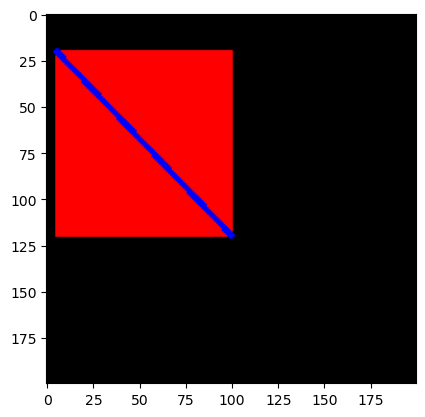

In [11]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (5, 20)
PT2 = (100,120)
cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

* cv2.circle(img, (centro), radio, (color), thickness=)

* cv2.putText(img, "Texto", (punto de inicio), fuente, tamaño, (color), thickness=)
 * fuente -> cv2.FONT_HERSHEY_SIMPLEX

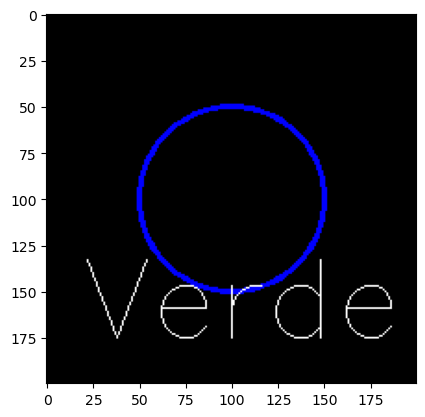

In [12]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (0, 20)
PT2 = (100,120)

# cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
# cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)
cv2.circle(black, (100,100), 50, (255,0,0), thickness=2)
cv2.putText(black, "Verde", (20,175), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), thickness=1)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

### Cambiar tamaño de una imagen con OpenCV-> [resize](https://pythonexamples.org/python-opencv-cv2-resize-image/)

cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)

*******
* 1. `cv2.INTER_NEAREST`

Usa el valor del píxel más cercano sin interpolación.  
**Ventajas:** Muy rápido computacionalmente.  
**Desventajas:** Produce imágenes pixeladas y con bordes marcados.  
**Uso típico:** Mapas, gráficos o imágenes con pocos colores.  



* 2. `cv2.INTER_LINEAR`

Calcula el nuevo valor de píxel como una combinación lineal de los vecinos más cercanos.  
**Ventajas:** Buen equilibrio entre calidad y velocidad.  
**Desventajas:** Puede generar una ligera suavidad o pérdida de nitidez.  
**Uso típico:** Reducciones o ampliaciones moderadas (es el método por defecto de OpenCV).  



* 3. `cv2.INTER_AREA`

Calcula el promedio de los píxeles del área correspondiente.  
**Ventajas:** Muy bueno para reducir imágenes (downscaling), evita aliasing.  
**Desventajas:** No se recomienda para ampliaciones.  
**Uso típico:** Reducción de imágenes o creación de miniaturas.  


* 4. `cv2.INTER_CUBIC`

Usa interpolación bicúbica considerando un vecindario de 4×4 píxeles.  
**Ventajas:** Produce imágenes suaves y detalladas con buena calidad visual.  
**Desventajas:** Más lento que LINEAR y AREA.  
**Uso típico:** Ampliaciones o procesamiento donde la calidad es importante.  


* 5. `cv2.INTER_LANCZOS4`

Utiliza un filtro sinc de 8×8 píxeles para obtener una interpolación de muy alta calidad.  
**Ventajas:** Máxima fidelidad visual tanto al ampliar como al reducir.  
**Desventajas:** Más lento y más exigente computacionalmente.  
**Uso típico:** Aplicaciones de edición o análisis donde la precisión de detalle es prioritaria.  


(337, 600, 3)


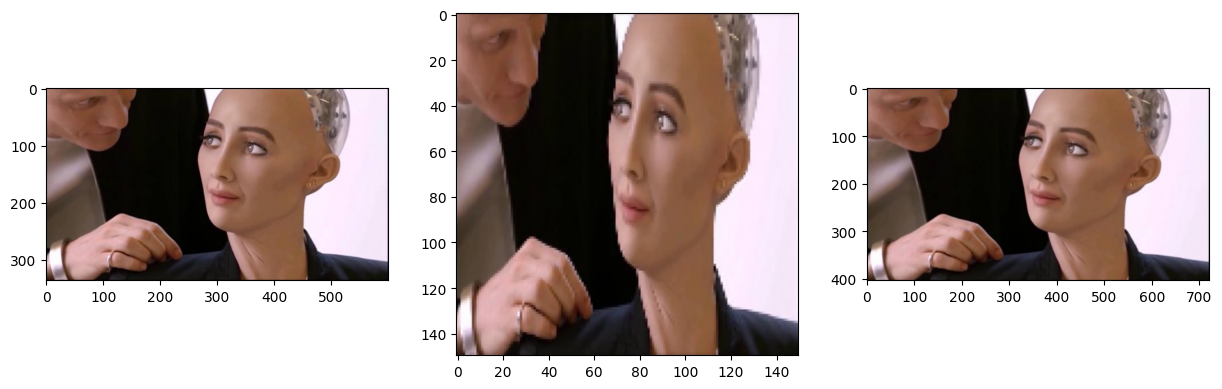

In [10]:
img = cv2.imread(imgSRC)[...,::-1]

# img_resize_small = cv2.resize(img, None, fx=1/2, fy=1/3, interpolation=cv2.INTER_LINEAR)
img_resize_small = cv2.resize(img, (150,150), interpolation=cv2.INTER_LANCZOS4)
img_resize_big = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)

print(img.shape)
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img_resize_small)
plt.subplot(133)
plt.imshow(img_resize_big)
plt.show()

P5. Cree un bucle para mostrar la imágen original y el efecto de las 5 diferentes interpolaciones al escalar a la mitad su ancho y largo. Se nota la diferencia?

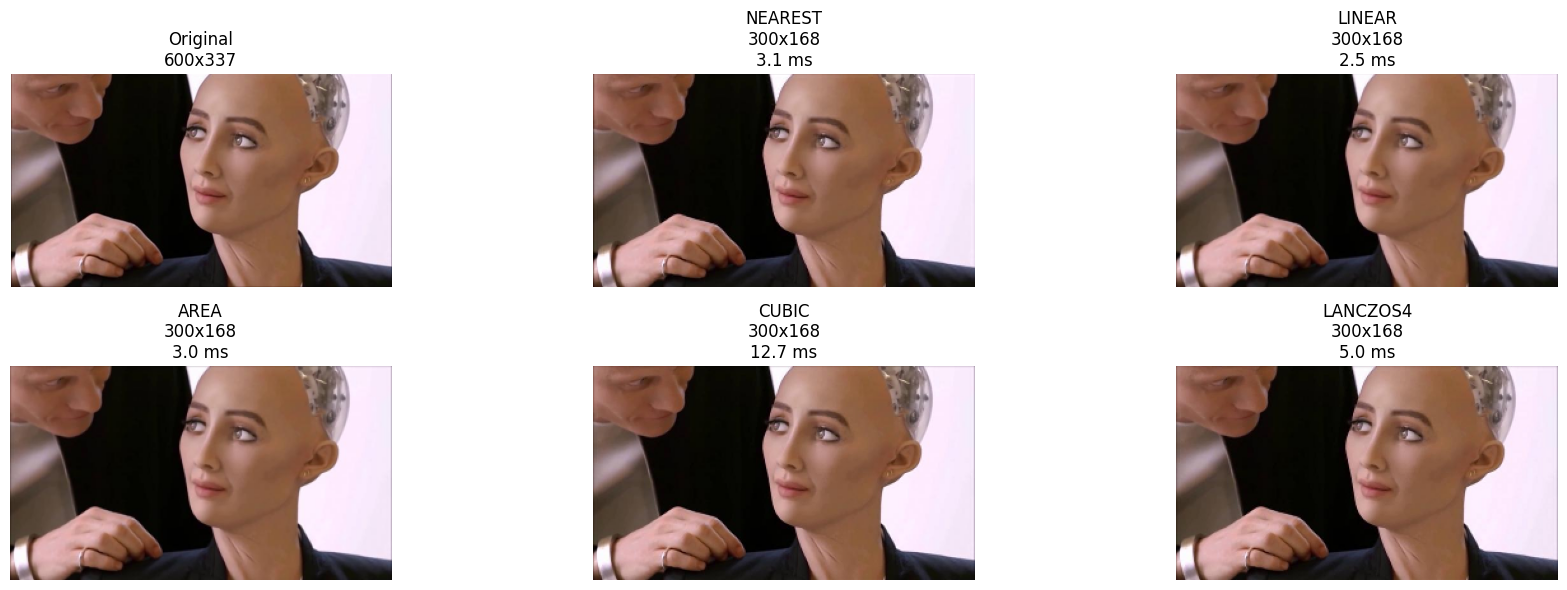

In [11]:
import time
img = cv2.imread(imgSRC)[..., ::-1]

# Lista de interpolaciones y sus nombres
interpolations = [
    ("NEAREST", cv2.INTER_NEAREST),
    ("LINEAR", cv2.INTER_LINEAR),
    ("AREA", cv2.INTER_AREA),
    ("CUBIC", cv2.INTER_CUBIC),
    ("LANCZOS4", cv2.INTER_LANCZOS4)
]

plt.figure(figsize=(18, 6))

# Mostrar imagen original
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title(f"Original\n{img.shape[1]}x{img.shape[0]}")
plt.axis("off")

# Bucle sobre las interpolaciones
for i, (name, method) in enumerate(interpolations, start=2):
    # Medir tiempo
    start = time.time()
    # Redimensionar a 20% del tamaño
    img_resized = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=method)
    end = time.time()

    # Mostrar
    plt.subplot(2, 3, i)
    plt.imshow(img_resized)
    plt.title(f"{name}\n{img_resized.shape[1]}x{img_resized.shape[0]}\n{(end-start)*1000:.1f} ms")
    plt.axis("off")

plt.tight_layout()
plt.show()

En el código se utilizó la función cv2.resize de OpenCV dentro de un bucle para aplicar cinco métodos de interpolación diferentes (`NEAREST`, `LINEAR`, `AREA`, `CUBIC` y `LANCZOS4`) al reducir una imagen al 50 % de su tamaño original.Esta escala de reducción no es muy grande (solo 0.5×), los píxeles originales ya están lo suficientemente cerca, así que todos los métodos generan resultados similares.El único que puede notarse un poco distinto es NEAREST, porque no interpola (solo copia el píxel más cercano), lo que a veces genera un efecto más “cuadriculado”.

### Mostrar imagen con OpenCV en una ventana
HACER ESTO FUERA DE UN NOTEBOOK

cv2.imshow(nombre de ventana, imagen)
* cv2.waitKey(0)  
* cv2.destroyAllWindows()  

In [12]:
# img = cv2.imread(imgSRC)
# cv2.imshow('Robot Sofia', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
imgSRC = 'lab_images/robotSofia.jpg'  

# Leer la imagen
img = cv2.imread(imgSRC)

# Verificar que la imagen se haya cargado
if img is None:
    print("No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Mostrar la imagen en una ventana
    cv2.imshow('Robot Sofia', img)

    # Esperar hasta que presiones una tecla
    cv2.waitKey(0)

    # Cerrar todas las ventanas
    cv2.destroyAllWindows()

# <font color=#FF0000>Operaciones de punto</color>


### Negativo de una imagen

* s = 255- f(r)

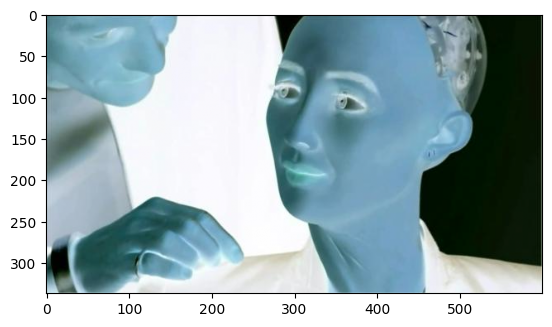

In [5]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = 1 - r
plt.imshow(s)
plt.show()

### Tranformacion Logarítmica
* s = c.log(1+r)

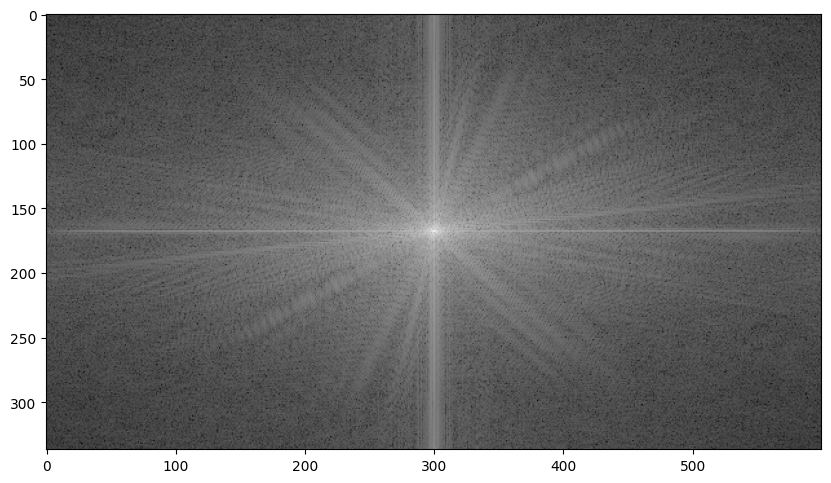

In [10]:
img = cv2.imread(imgSRC, 0)

fft_2 = np.fft.fft2(img)
fft_2_abs = np.abs(fft_2)
fft_2_abs = np.fft.fftshift(fft_2_abs)
fft_2_abs_log = np.log(fft_2_abs+1)

plt.figure(figsize=(10,15))
plt.imshow(fft_2_abs_log, cmap='gray')
plt.show()

P6. Compruebe cuanto son los valores mínimo y máximo de la imagen original y de la imágen que muestra el espectro. Luego describa que efecto tuvo la transformación logarítmica.

### Transformación Gamma
###   $s=cr^\gamma $

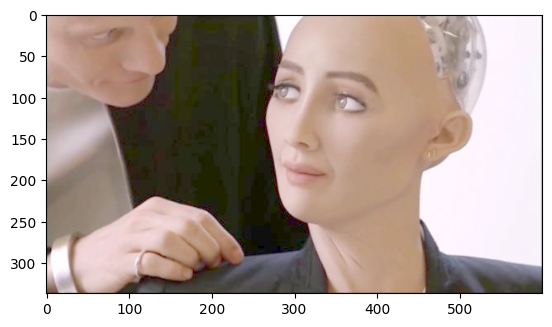

In [14]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = r**0.5
plt.imshow(s)
plt.show()

### Transformación arbitraria
* ####   Especificar una funcion de transformacion
cv2.LUT(img, lut)

In [15]:
img.shape

(337, 600)

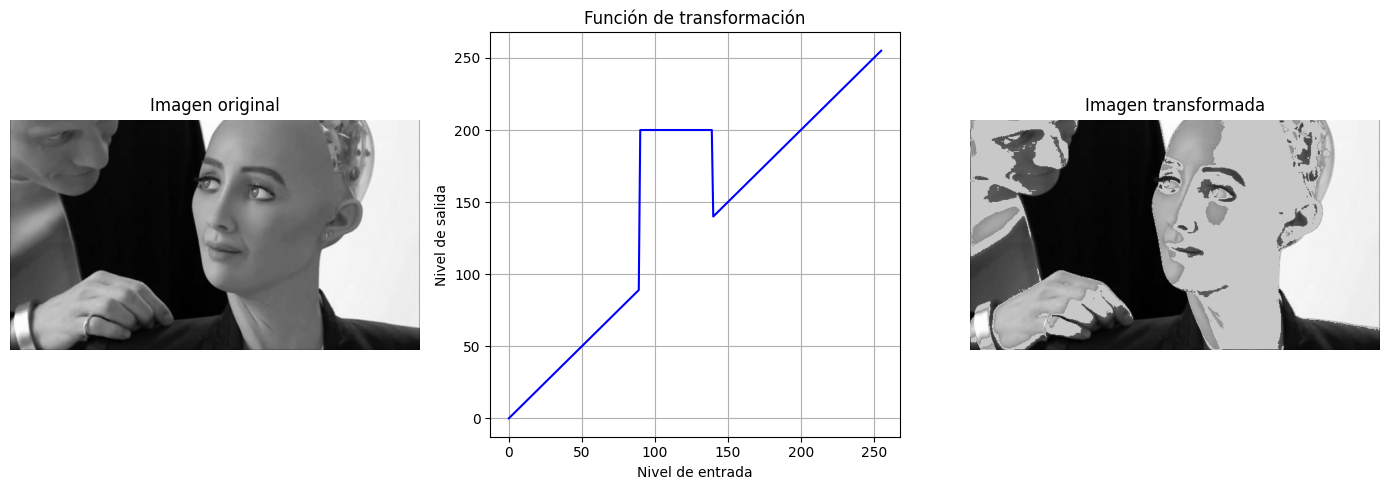

In [ ]:
funcion_ejemplo = np.arange(256)
funcion_ejemplo[90:140] = 200

img = cv2.imread(imgSRC, 0)
img_out = funcion_ejemplo[img]

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.plot(funcion_ejemplo, color="blue")
plt.title("Función de transformación")
plt.xlabel("Nivel de entrada")
plt.ylabel("Nivel de salida")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img_out, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen transformada")
plt.axis("off")

plt.tight_layout()
plt.show()


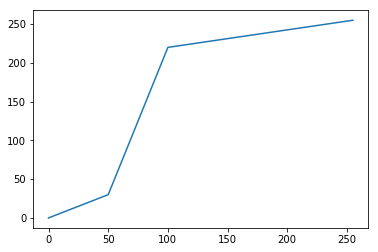

In [36]:
r = np.zeros(256)

for pix in range(256):
    if pix < 50:
        r[pix] = 30/50*(pix-50) + 30
    if 50 <=pix < 100:
        r[pix] = 190/50*(pix-50) + 30
    if 100 <=pix:
        r[pix] = 35/155*(pix-100) + 220

plt.plot(r)
plt.show()

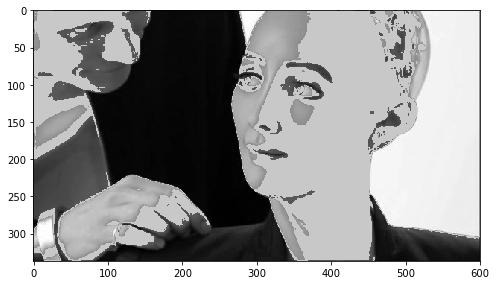

In [32]:
img = cv2.imread(imgSRC,0)
s=cv2.LUT(img, funcion_ejemplo)
plt.figure(figsize=(8,10))
plt.imshow(s, cmap='gray')
plt.show()

### División en capas de bits 

* np.bitwise_and(imagen, bit)

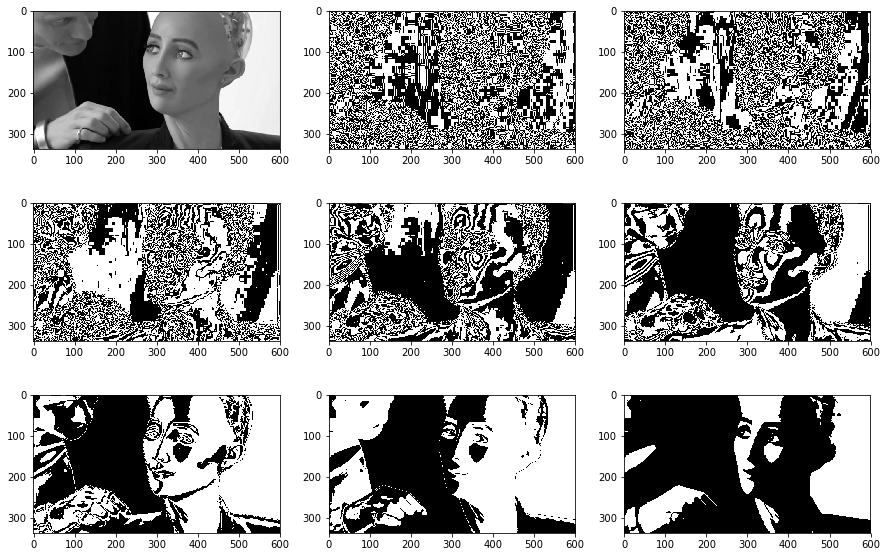

In [51]:
img = cv2.imread(imgSRC, 0)

img7 = cv2.bitwise_and(img, 128)
img6 = cv2.bitwise_and(img, 64)
img5 = cv2.bitwise_and(img, 32)
img4 = cv2.bitwise_and(img, 16)
img3 = cv2.bitwise_and(img, 8)
img2 = cv2.bitwise_and(img, 4)
img1 = cv2.bitwise_and(img, 2)
img0 = cv2.bitwise_and(img, 1)

plt.figure(figsize=(15, 10))
plt.subplot(331)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(332)
plt.imshow(img0, cmap="gray")
plt.subplot(333)
plt.imshow(img1, cmap="gray")
plt.subplot(334)
plt.imshow(img2, cmap="gray")
plt.subplot(335)
plt.imshow(img3, cmap="gray")
plt.subplot(336)
plt.imshow(img4, cmap="gray")
plt.subplot(337)
plt.imshow(img5, cmap="gray")
plt.subplot(338)
plt.imshow(img6, cmap="gray")
plt.subplot(339)
plt.imshow(img7, cmap="gray")

#### Mostrar solo las 5 capas mas significativas

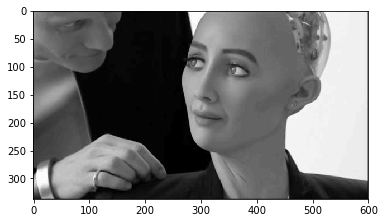

In [61]:
img_comprimida = img7+ img6 + img5 + img4 + img3 + img2
plt.imshow(img_comprimida, cmap="gray", vmin=0, vmax=255)

P7. Si usted quisiera encriptar un  mensaje dentro de una fotografía, como lo haría?

### Histograma de una imagen
* np.histogram(img, bins, [rango de datos])  (requiere plotear)
* plt.hist(img.ravel(), bins, [rango de datos])
* cv2.calcHist([img], [canal], mascara,[bins], [rango de datos])

#####  Normalizar CDF $ \frac{cdf*hist.max}{cdf.max} $

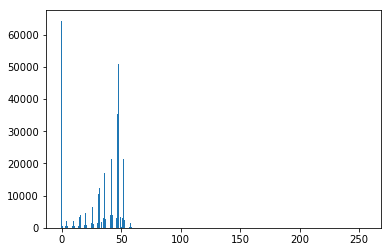

In [78]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

hist, bins = np.histogram(img_gray, 256, [0, 256])
plt.bar(np.arange(256), hist)
plt.show()

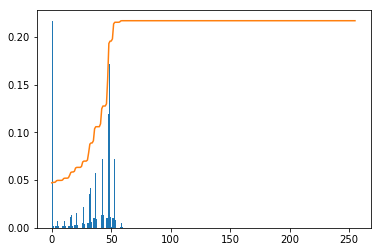

In [95]:
#matplotlib
hist = plt.hist(img_gray.ravel(), 256, [0,256], density=True)
cdf = np.cumsum(hist[0])
cdf_norm = cdf*(hist[0].max())/(cdf.max())
plt.plot(cdf_norm)

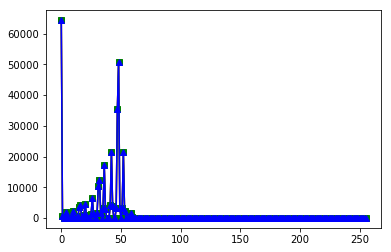

In [123]:
# openCV
color = ("r*-", "gs-", "b^-")
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None,[256], [0,256])
    plt.plot(hist, col)

### Equalización de Histograma
* cv2.equalizeHist(img) 

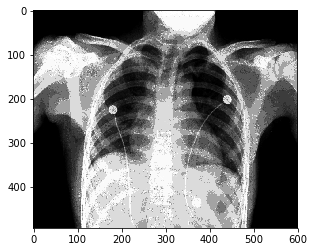

In [126]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

img_equ = cv2.equalizeHist(img_gray)
plt.imshow(img_equ, cmap="gray", vmin=0, vmax=255)

P8. Que sucede durante la equalización de histograma?

### Equalización de Histograma adaptativa
*clahe = createCLAHE() 
*clahe.apply(img) 

* [CLAHE Histogram Eqalization](https://www.geeksforgeeks.org/clahe-histogram-eqalization-opencv/)

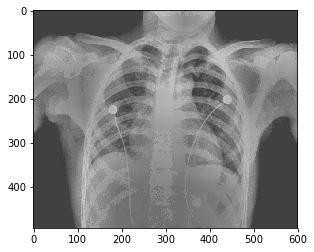

In [133]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(img_gray) + 60

plt.imshow(final_img, cmap="gray", vmin=0, vmax=255)

P8. Que diferencias ve usted en la equalización normal y la equalización adaptativa (CLAHE)

## Histogram Matching

Aplique a una foto suya el estilo de la monalisa usando histogram matching. Use estas guías como referencia

https://www.pyimagesearch.com/2021/02/08/histogram-matching-with-opencv-scikit-image-and-python/
https://automaticaddison.com/how-to-do-histogram-matching-using-opencv/


# Tema de investigación

Elija su tema de investigación de la lista proporcionada por el docente o proponga un nuevo tema. Su grupo puede ser únicamente de 3 estudiantes.

# INTEGRANTES

1.

2.

3.